## Load geo data

This post shows hoow to build a choropleth map for US counties. County border coordinates have been found here and stored on github [here](https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/counties-albers-10m.json). Let's load this data stored at `json` format with `geopandas`, and draw a map with it thanks to `geoplot`.

In [56]:
# Import the geopandas and geoplot libraries
import geopandas as gpd
import geoplot as gplt

# Load the json file with county coordinates
#geoData = gpd.read_file('https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/counties-albers-10m.json')
geoData = gpd.read_file('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json')

#geoData = gpd.read_file('/Users/yan.holtz/Downloads/gz_2010_us_050_00_5m.json')

# Make sure the "id" column is an integer
geoData.id = geoData.id.astype(str).astype(int)

# Remove Alaska, Hawaii and Virgin Island..
stateToRemove = ['02', '15']
geoData = geoData[~geoData.STATE.isin(stateToRemove)]
geoData

#gplt.polyplot(geoData, figsize=(20, 4) )


,id,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry
0,1001,0500000US01001,01,001,Autauga,County,594.436,"POLYGON ((-86.49677 32.34444, -86.71790 32.402..."
1,1009,0500000US01009,01,009,Blount,County,644.776,"POLYGON ((-86.57780 33.76532, -86.75914 33.840..."
2,1017,0500000US01017,01,017,Chambers,County,596.531,"POLYGON ((-85.18413 32.87053, -85.12342 32.772..."
3,1021,0500000US01021,01,021,Chilton,County,692.854,"POLYGON ((-86.51734 33.02057, -86.51596 32.929..."
4,1033,0500000US01033,01,033,Colbert,County,592.619,"POLYGON ((-88.13999 34.58170, -88.13925 34.587..."
...,...,...,...,...,...,...,...,...
3216,51001,0500000US51001,51,001,Accomack,County,449.496,"MULTIPOLYGON (((-75.24227 38.02721, -75.29687 ..."
3217,51021,0500000US51021,51,021,Bland,County,357.725,"POLYGON ((-81.22510 37.23487, -81.20477 37.243..."
3218,51027,0500000US51027,51,027,Buchanan,County,502.763,"POLYGON ((-81.96830 37.53780, -81.92787 37.512..."
3219,51037,0500000US51037,51,037,Charlotte,County,475.271,"POLYGON ((-78.44332 37.07940, -78.49303 36.891..."


In [57]:
#from shapely.geometry.polygon import Polygon
#from shapely.geometry.multipolygon import MultiPolygon

#geoData["geometry"] = [MultiPolygon([feature]) if type(feature) == Polygon \
 #   else feature for feature in geoData["geometry"]]

#gplt.polyplot(geoData, figsize=(20, 4) )

## Load numeric data

A choropleth map shows the distribution of a numeric variable on each items of a map. Let's consider the unemployment rate of each US county. Data comes from the Bureau of Labor Statistics, found [here](https://observablehq.com/@d3/choropleth) and stored here.

<AxesSubplot:xlabel='rate'>

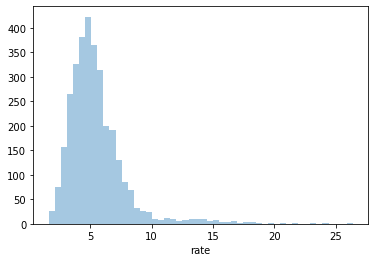

In [58]:
# library
import pandas as pd
import seaborn as sns

# Read file
data = pd.read_csv('https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/unemployment-x.csv')
data

# Show the distribution of unemployment rate
sns.distplot( data["rate"], hist=True, kde=False, rug=False )


## Merge spatial & numeric data


Both source of information need to be merged in order to be represented on the same figure. This can be done thanks to the

In [59]:
fullData = geoData.merge(data, left_on=['id'], right_on=['id'])
fullData

,id,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry,state,county,rate
0,1001,0500000US01001,01,001,Autauga,County,594.436,"POLYGON ((-86.49677 32.34444, -86.71790 32.402...",Alabama,Autauga County,5.1
1,1009,0500000US01009,01,009,Blount,County,644.776,"POLYGON ((-86.57780 33.76532, -86.75914 33.840...",Alabama,Blount County,5.1
2,1017,0500000US01017,01,017,Chambers,County,596.531,"POLYGON ((-85.18413 32.87053, -85.12342 32.772...",Alabama,Chambers County,5.0
3,1021,0500000US01021,01,021,Chilton,County,692.854,"POLYGON ((-86.51734 33.02057, -86.51596 32.929...",Alabama,Chilton County,5.2
4,1033,0500000US01033,01,033,Colbert,County,592.619,"POLYGON ((-88.13999 34.58170, -88.13925 34.587...",Alabama,Colbert County,6.5
...,...,...,...,...,...,...,...,...,...,...,...
3180,51001,0500000US51001,51,001,Accomack,County,449.496,"MULTIPOLYGON (((-75.24227 38.02721, -75.29687 ...",Virginia,Accomack County,4.3
3181,51021,0500000US51021,51,021,Bland,County,357.725,"POLYGON ((-81.22510 37.23487, -81.20477 37.243...",Virginia,Bland County,6.4
3182,51027,0500000US51027,51,027,Buchanan,County,502.763,"POLYGON ((-81.96830 37.53780, -81.92787 37.512...",Virginia,Buchanan County,10.9
3183,51037,0500000US51037,51,037,Charlotte,County,475.271,"POLYGON ((-78.44332 37.07940, -78.49303 36.891...",Virginia,Charlotte County,5.2


## Choropleth map with `GeoPlot`

<AxesSubplot:>

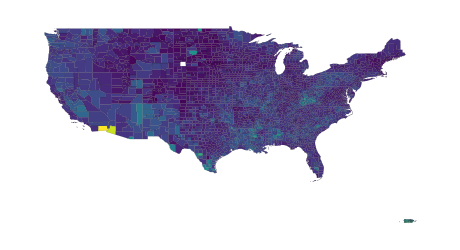

In [61]:
gplt.choropleth(fullData, 
    hue="rate", linewidth=.1
)